In [1]:
import pandas as pd

dataset = pd.read_csv("transaction.csv")
display(dataset)


,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland
...,...,...,...,...,...,...
10541,543911,21700,455,2/14/2011 12:46,17829,United Arab Emirates
10542,543911,22111,578,2/14/2011 12:46,17829,United Arab Emirates
10543,543911,22112,163,2/14/2011 12:46,17829,United Arab Emirates
10544,564428,23296,545,8/25/2011 11:27,17844,Canada


In [2]:
country = dataset['Country'].value_counts()
display(country)

Country
Germany                 2269
France                  2109
EIRE                    1620
Netherlands              634
Spain                    539
Belgium                  486
Switzerland              434
Portugal                 367
Australia                356
Norway                   239
Italy                    190
Channel Islands          184
Finland                  152
Cyprus                   113
Sweden                   109
Denmark                   98
Japan                     92
Austria                   88
Poland                    80
Israel                    61
USA                       47
Singapore                 45
Unspecified               44
Canada                    36
Iceland                   35
Greece                    33
United Arab Emirates      23
Malta                     15
RSA                       14
Brazil                     8
Lithuania                  8
Lebanon                    5
European Community         5
Czech Republic             4
Bahrai

In [3]:
transaksi = dataset.groupby('Country')['InvoiceNo'].nunique()
display(transaksi)

Country
Australia                44
Austria                  12
Bahrain                   1
Belgium                  84
Brazil                    1
Canada                    3
Channel Islands          21
Cyprus                   16
Czech Republic            2
Denmark                  18
EIRE                    224
European Community        3
Finland                  26
France                  344
Germany                 377
Greece                    5
Iceland                   6
Israel                    4
Italy                    31
Japan                    14
Lebanon                   1
Lithuania                 2
Malta                     2
Netherlands              76
Norway                   28
Poland                   17
Portugal                 43
RSA                       1
Saudi Arabia              1
Singapore                 4
Spain                    72
Sweden                   26
Switzerland              41
USA                       5
United Arab Emirates      2
Unspecified 

In [4]:
from sklearn.cluster import AgglomerativeClustering

data = transaksi.values.reshape(-1, 1)

clustering = AgglomerativeClustering(n_clusters=3, linkage='average')

clusters = clustering.fit_predict(data)

transaksi = transaksi.reset_index()
transaksi['Cluster'] = clusters

display(clusters)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
import numpy as np

centroids = {}
for cluster_id in range(3):
    cluster_data = data[clusters == cluster_id]
    centroid = np.mean(cluster_data)
    centroids[f'Cluster {cluster_id + 1}'] = centroid

display(centroids)

{'Cluster 1': 18.78787878787879, 'Cluster 2': 360.5, 'Cluster 3': 224.0}

In [6]:
sorted = dict(sorted(centroids.items(), key=lambda item: item[1]))

display(sorted)

{'Cluster 1': 18.78787878787879, 'Cluster 3': 224.0, 'Cluster 2': 360.5}

In [7]:
low_transaction_cluster = list(sorted.keys())[0]
medium_transaction_cluster = list(sorted.keys())[1]
high_transaction_cluster = list(sorted.keys())[2]

transaksi_rendah = transaksi[transaksi['Cluster'] == int(low_transaction_cluster[-1])]
transaksi_sedang = transaksi[transaksi['Cluster'] == int(medium_transaction_cluster[-1])]
transaksi_tinggi = transaksi[transaksi['Cluster'] == int(high_transaction_cluster[-1])]

print("Cluster Transaksi Rendah:", transaksi_rendah['Country'].tolist())
print("Cluster Transaksi Sedang:", transaksi_sedang['Country'].tolist())
print("Cluster Transaksi Tinggi:", transaksi_tinggi['Country'].tolist())


Cluster Transaksi Rendah: ['France', 'Germany']
Cluster Transaksi Sedang: []
Cluster Transaksi Tinggi: ['EIRE']


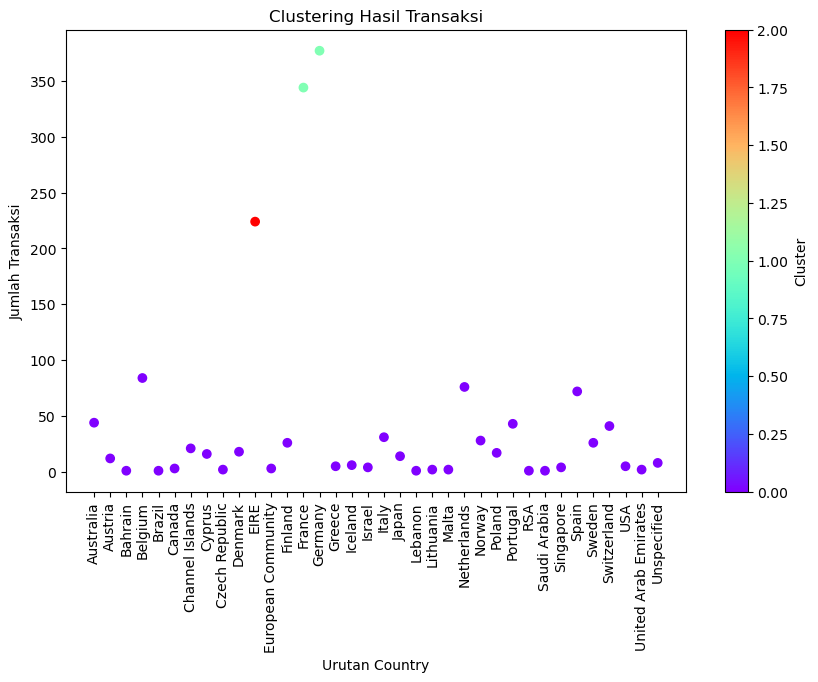

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(transaksi)), transaksi['InvoiceNo'], c=clusters, cmap='rainbow')
plt.xlabel('Urutan Country')
plt.ylabel('Jumlah Transaksi')
plt.title('Clustering Hasil Transaksi')
plt.xticks(range(len(transaksi)), transaksi['Country'], rotation=90)
plt.colorbar(label='Cluster')
plt.show()